In [1]:
import pandas as pd

class DataLoader:
    def __init__(self, filepath):
        self.filepath = filepath
        self.data = None

    def load_data(self):
        """Cargar el conjunto de datos desde la ruta del archivo especificada."""
        self.data = pd.read_csv(self.filepath)
        print("Datos cargados con éxito.")

    def show_head(self, n=5):
        """Mostrar las primeras 'n' filas del conjunto de datos."""
        if self.data is not None:
            return self.data.head(n)
        else:
            print("Datos no cargados. Por favor, primero ejecute la función load_data.")

In [2]:
# Uso de la clase DataLoader
data_loader = DataLoader("//Users/adrianinfantes/Desktop/AIR/COLLEGE AND STUDIES/Data_Scientist_formation/BankProjects/HomeLoanApproval/data/loan_sanction_train.csv")
data_loader.load_data()
data_loader.show_head()

Datos cargados con éxito.


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
class DataInspector:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def get_info(self):
        """Muestra información general del DataFrame."""
        return self.dataframe.info()

    def describe_data(self):
        """Proporciona estadísticas descriptivas para las columnas numéricas."""
        return self.dataframe.describe()

    def check_null(self):
        """Identifica y cuenta los valores nulos en cada columna."""
        return self.dataframe.isnull().sum()

In [4]:
# Uso de la clase DataInspector
# Suponiendo que 'data_loader' es una instancia de DataLoader con datos ya cargados
data_inspector = DataInspector(data_loader.data)
print("Información General del DataFrame:")
data_inspector.get_info()
print("\nEstadísticas Descriptivas:")
print(data_inspector.describe_data())
print("\nValores Nulos en el DataFrame:")
print(data_inspector.check_null())

Información General del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB

Estadísticas Descriptivas:
       ApplicantIncome  CoapplicantIncome  LoanAm

In [5]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler

class DataPreprocessor:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def handle_missing_values(self):
        """Manejo de valores nulos en el DataFrame."""
        # Para columnas numéricas
        numeric_cols = self.dataframe.select_dtypes(include=np.number).columns
        for col in numeric_cols:
            self.dataframe[col].fillna(self.dataframe[col].median(), inplace=True)

        # Para columnas categóricas
        categorical_cols = self.dataframe.select_dtypes(include='object').columns
        for col in categorical_cols:
            self.dataframe[col].fillna(self.dataframe[col].mode()[0], inplace=True)

    def encode_binary_columns(self):
        """Codifica columnas binarias según las reglas especificadas."""
        mappings = {'Male': 1, 'Female': 0, 'Yes': 1, 'No': 0, 'Y': 1, 'N': 0}
        columns = ['Gender', 'Married', 'Self_Employed']
        if 'Loan_Status' in self.dataframe.columns:
            columns.append('Loan_Status')
        for col in columns:
            self.dataframe[col] = self.dataframe[col].map(mappings)


    def encode_dependents(self):
        """Convierte la columna 'Dependents' a valores numéricos."""
        self.dataframe['Dependents'] = self.dataframe['Dependents'].replace({'3+': 3}).astype(int)

    def apply_one_hot_encoding(self):
        """Aplica One-Hot Encoding a las columnas seleccionadas."""
        encoder = OneHotEncoder(sparse=False)
        columns = ['Education', 'Property_Area']
        for col in columns:
            encoded = encoder.fit_transform(self.dataframe[[col]])
            # Crear nombres de columnas para las nuevas características
            cols = [f"{col}_{category}" for category in encoder.categories_[0]]
            # Añadir las nuevas columnas al DataFrame
            self.dataframe[cols] = encoded
            # Eliminar la columna original
            self.dataframe.drop(col, axis=1, inplace=True)
            
    def scale_numeric_columns(self):
        """Escala las columnas numéricas especificadas."""
        scaler = StandardScaler()
        columns_to_scale = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
        self.dataframe[columns_to_scale] = scaler.fit_transform(self.dataframe[columns_to_scale])
        
    def encode_dependents(self):
        """Convierte la columna 'Dependents' a valores numéricos."""
        # Primero reemplazar '3+' con 3
        self.dataframe['Dependents'] = self.dataframe['Dependents'].replace({'3+': 3}).astype(int)

        # Luego convertir cualquier valor distinto de 0 en 1
        self.dataframe['Dependents'] = self.dataframe['Dependents'].apply(lambda x: 1 if x != 0 else 0)

In [6]:
# Uso de la clase DataPreprocessor

data_preprocessor = DataPreprocessor(data_loader.data)
data_preprocessor.handle_missing_values()
data_loader.show_head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
data_preprocessor.encode_binary_columns()
data_loader.show_head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,Graduate,0,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,1,1,1,Graduate,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,1,0,Graduate,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,1,0,Not Graduate,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,0,0,Graduate,0,6000,0.0,141.0,360.0,1.0,Urban,1


In [8]:
data_preprocessor.encode_dependents()
data_loader.show_head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,Graduate,0,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,1,1,1,Graduate,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,1,0,Graduate,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,1,0,Not Graduate,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,0,0,Graduate,0,6000,0.0,141.0,360.0,1.0,Urban,1


In [9]:
data_preprocessor.apply_one_hot_encoding()
data_loader.show_head()

/Users/adrianinfantes/Library/Caches/pypoetry/virtualenvs/homeloanapproval--OUspGC6-py3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adrianinfantes/Library/Caches/pypoetry/virtualenvs/homeloanapproval--OUspGC6-py3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Loan_ID,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,0,5849,0.0,128.0,360.0,1.0,1,1.0,0.0,0.0,0.0,1.0
1,LP001003,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,1.0,0.0,1.0,0.0,0.0
2,LP001005,1,1,0,1,3000,0.0,66.0,360.0,1.0,1,1.0,0.0,0.0,0.0,1.0
3,LP001006,1,1,0,0,2583,2358.0,120.0,360.0,1.0,1,0.0,1.0,0.0,0.0,1.0
4,LP001008,1,0,0,0,6000,0.0,141.0,360.0,1.0,1,1.0,0.0,0.0,0.0,1.0


In [10]:
data_preprocessor.scale_numeric_columns()
data_loader.show_head()

,Loan_ID,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,0,0.072991,-0.554487,-0.211241,0.273231,1.0,1,1.0,0.0,0.0,0.0,1.0
1,LP001003,1,1,1,0,-0.134412,-0.038732,-0.211241,0.273231,1.0,0,1.0,0.0,1.0,0.0,0.0
2,LP001005,1,1,0,1,-0.393747,-0.554487,-0.948996,0.273231,1.0,1,1.0,0.0,0.0,0.0,1.0
3,LP001006,1,1,0,0,-0.462062,0.251980,-0.306435,0.273231,1.0,1,0.0,1.0,0.0,0.0,1.0
4,LP001008,1,0,0,0,0.097728,-0.554487,-0.056551,0.273231,1.0,1,1.0,0.0,0.0,0.0,1.0


In [11]:
data_preprocessor.encode_dependents()
data_loader.show_head()

,Loan_ID,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,0,0.072991,-0.554487,-0.211241,0.273231,1.0,1,1.0,0.0,0.0,0.0,1.0
1,LP001003,1,1,1,0,-0.134412,-0.038732,-0.211241,0.273231,1.0,0,1.0,0.0,1.0,0.0,0.0
2,LP001005,1,1,0,1,-0.393747,-0.554487,-0.948996,0.273231,1.0,1,1.0,0.0,0.0,0.0,1.0
3,LP001006,1,1,0,0,-0.462062,0.251980,-0.306435,0.273231,1.0,1,0.0,1.0,0.0,0.0,1.0
4,LP001008,1,0,0,0,0.097728,-0.554487,-0.056551,0.273231,1.0,1,1.0,0.0,0.0,0.0,1.0


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

class DataVisualizer:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def plot_distribution(self, column):
        """Genera un gráfico de barras para la columna especificada."""
        if column not in self.dataframe.columns:
            print(f"La columna {column} no existe en el DataFrame.")
            return

        # Conteo de valores
        value_counts = self.dataframe[column].value_counts()

        plt.figure(figsize=(8, 4))
        sns.barplot(x=value_counts.index, y=value_counts.values)
        plt.title(f'Distribución de {column}')
        plt.ylabel('Cantidad')
        plt.xlabel(column)
        plt.show()

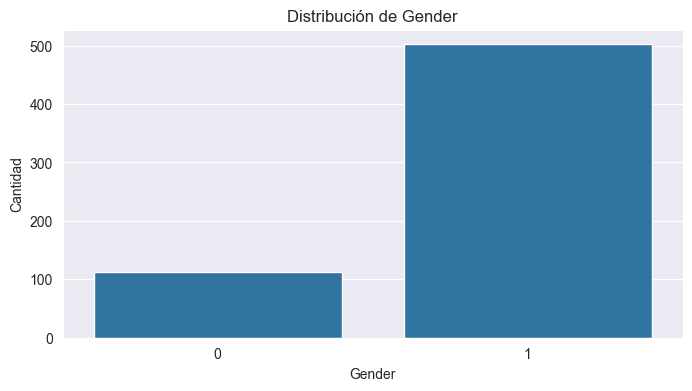

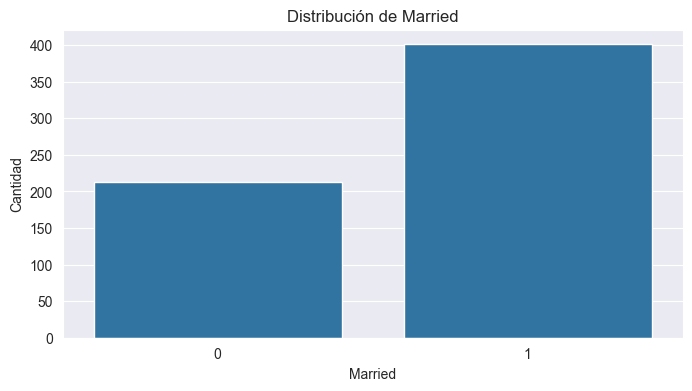

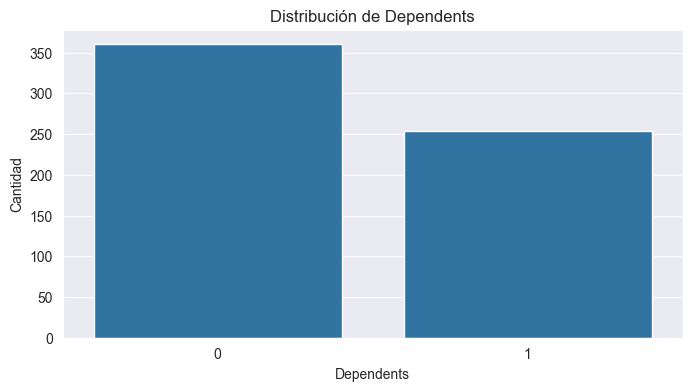

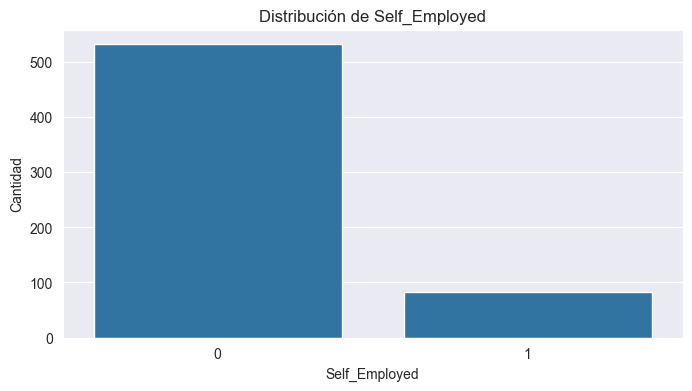

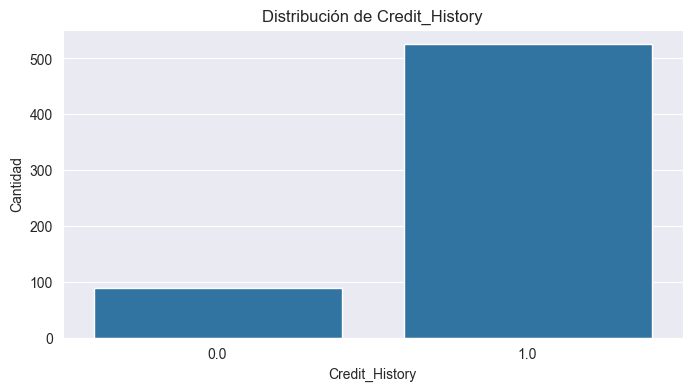

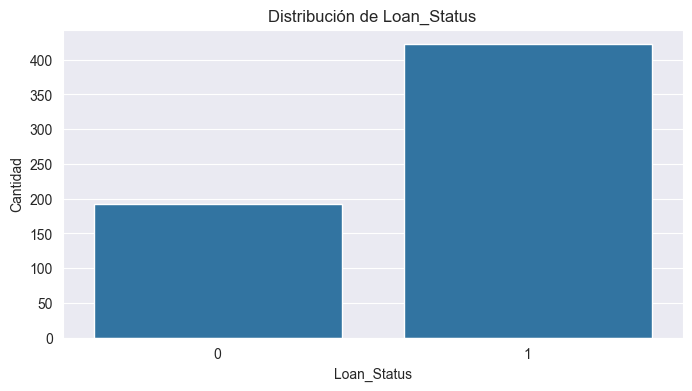

In [13]:
# Crear una instancia de DataVisualizer
data_visualizer = DataVisualizer(data_loader.data)

# Visualizar distribuciones
columns_to_visualize = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Status']
for col in columns_to_visualize:
    data_visualizer.plot_distribution(col)

In [14]:
from sklearn.model_selection import train_test_split

class DataSplitter:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def split_data(self, target_column, test_size=0.2, random_state=42):
        """Divide los datos en conjuntos de entrenamiento y prueba, excluyendo la columna 'ID'."""
        X = self.dataframe.drop([target_column, 'Loan_ID'], axis=1)  # Excluir 'ID' junto con la columna objetivo
        y = self.dataframe[target_column]
        return train_test_split(X, y, test_size=test_size, random_state=random_state)

In [15]:
# Uso de la clase DataSplitter

# Crear una instancia de DataSplitter
data_splitter = DataSplitter(data_preprocessor.dataframe)

# Dividir los datos, asumiendo que 'Loan_Status' es la columna objetivo
X_train, X_test, y_train, y_test = data_splitter.split_data(target_column='Loan_Status')

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

class ModelTester:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

    def train_and_evaluate_model(self, model, model_name):
        """Entrena y evalúa un modelo."""
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)

        accuracy = accuracy_score(self.y_test, y_pred)
        f1 = f1_score(self.y_test, y_pred)
        auc = roc_auc_score(self.y_test, y_pred)

        print(f"Resultados para {model_name}:")
        print(f"  Precisión: {accuracy:.2f}, F1-Score: {f1:.2f}, AUC: {auc:.2f}")

    def grid_search(self, model, param_grid, model_name):
        """Realiza una búsqueda en cuadrícula para encontrar los mejores hiperparámetros."""
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(self.X_train, self.y_train)
        best_model = grid_search.best_estimator_

        print(f"\nMejores hiperparámetros para {model_name}: {grid_search.best_params_}")
        self.train_and_evaluate_model(best_model, f"{model_name} (Mejor)")

    def ensemble_models(self):
        """Crea y retorna un ensamblaje de varios modelos."""
        print("\nProbando Ensamblaje de Modelos...")
        logistic = LogisticRegression()
        random_forest = RandomForestClassifier()
        svm = SVC(probability=True)
        adaboost = AdaBoostClassifier()

        ensemble_model = VotingClassifier(estimators=[
            ('lr', logistic), 
            ('rf', random_forest), 
            ('svc', svm), 
            ('ada', adaboost)
        ], voting='soft')

        self.train_and_evaluate_model(ensemble_model, "Ensamblaje de Modelos")
        return ensemble_model

In [17]:
model_tester = ModelTester(X_train, X_test, y_train, y_test)

In [18]:
# Pruebas con Regresión Logística
log_reg_model = model_tester.grid_search(LogisticRegression(), {'C': [0.1, 1, 10]}, 'Regresión Logística')
log_reg_model


Mejores hiperparámetros para Regresión Logística: {'C': 1}
Resultados para Regresión Logística (Mejor):
  Precisión: 0.79, F1-Score: 0.86, AUC: 0.70


In [19]:
# Pruebas con Random Forest
random_model = model_tester.grid_search(RandomForestClassifier(), {'n_estimators': [10, 100, 1000]}, 'Random Forest')
random_model


Mejores hiperparámetros para Random Forest: {'n_estimators': 100}
Resultados para Random Forest (Mejor):
  Precisión: 0.78, F1-Score: 0.85, AUC: 0.70


In [20]:
# Pruebas con SVM
svc_model = model_tester.grid_search(SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}, 'SVM')
svc_model


Mejores hiperparámetros para SVM: {'C': 0.1, 'kernel': 'linear'}
Resultados para SVM (Mejor):
  Precisión: 0.79, F1-Score: 0.86, AUC: 0.70


In [21]:
# Pruebas con AdaBoost
ada_model = model_tester.grid_search(AdaBoostClassifier(), {'n_estimators': [50, 100, 200]}, 'AdaBoost')
ada_model


Mejores hiperparámetros para AdaBoost: {'n_estimators': 50}
Resultados para AdaBoost (Mejor):
  Precisión: 0.78, F1-Score: 0.85, AUC: 0.70


In [22]:
# Prueba del Ensamblaje de Modelos
ensemble_model = model_tester.ensemble_models()
ensemble_model


Probando Ensamblaje de Modelos...
Resultados para Ensamblaje de Modelos:
  Precisión: 0.79, F1-Score: 0.86, AUC: 0.70


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(probability=True)),
                             ('ada', AdaBoostClassifier())],
                 voting='soft')

In [23]:
# Guardar el modelo Ensamblaje de Modelos
import pickle

ensemble_model = model_tester.ensemble_models()

# Verificación antes de guardar
print("Tipo de modelo antes de guardar:", type(ensemble_model))

# Guardar si el modelo es válido
if ensemble_model is not None:
    with open('ensemble_model.pkl', 'wb') as f:
        pickle.dump(ensemble_model, f)
    print("Modelo guardado con éxito.")
else:
    print("No hay modelo para guardar.")


Probando Ensamblaje de Modelos...
Resultados para Ensamblaje de Modelos:
  Precisión: 0.79, F1-Score: 0.86, AUC: 0.70
Tipo de modelo antes de guardar: <class 'sklearn.ensemble._voting.VotingClassifier'>
Modelo guardado con éxito.


In [24]:
# Cargar el conjunto de datos de prueba
test_data_loader = DataLoader("/Users/adrianinfantes/Desktop/AIR/COLLEGE AND STUDIES/Data_Scientist_formation/BankProjects/HomeLoanApproval/data/loan_sanction_test.csv")
test_data_loader.load_data()
test_data_loader.show_head()

Datos cargados con éxito.


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [25]:
# Preprocesar los datos de prueba (asegurándote de no incluir la transformación del objetivo)
test_data_preprocessor = DataPreprocessor(test_data_loader.data)
test_data_preprocessor.handle_missing_values()
test_data_preprocessor.encode_binary_columns()
test_data_preprocessor.encode_dependents()
test_data_preprocessor.apply_one_hot_encoding()
test_data_preprocessor.scale_numeric_columns()

/Users/adrianinfantes/Library/Caches/pypoetry/virtualenvs/homeloanapproval--OUspGC6-py3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adrianinfantes/Library/Caches/pypoetry/virtualenvs/homeloanapproval--OUspGC6-py3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [26]:
import os
import pickle

model_file_path = '/Users/adrianinfantes/Desktop/AIR/COLLEGE AND STUDIES/Data_Scientist_formation/BankProjects/HomeLoanApproval/model/ensemble_model.pkl'

# Verificar si el archivo del modelo existe
if os.path.exists(model_file_path):
    with open(model_file_path, 'rb') as f:
        loaded_model = pickle.load(f)
    print("Modelo cargado con éxito.")
    print("Tipo de modelo cargado:", type(loaded_model))
else:
    print(f"Error: El archivo del modelo no se encontró en {model_file_path}")

# Si el modelo se cargó correctamente, proceder con la predicción
if loaded_model is not None:
    predictions = loaded_model.predict(test_data_preprocessor.dataframe.drop('Loan_ID', axis=1))
    print("Predicciones realizadas con éxito.")
    print("Predicciones:", predictions)
else:
    print("No se pudo cargar el modelo para hacer predicciones.")

Modelo cargado con éxito.
Tipo de modelo cargado: <class 'sklearn.ensemble._voting.VotingClassifier'>
Predicciones realizadas con éxito.
Predicciones: [1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
